<h1><center>Particles and decays<br>in the Scikit-HEP project</center></h1>

<h2><center>Eduardo Rodrigues<br>University of Cincinnati </center></h2>

<h3><center>PyHEP 2019 Workshop, Abingdon, 16-18 October 2019</center></h3>

![Particle](images/Particle_logo.png)

<h1><center><span style="color:green">PDG particle data and MC identification codes with the <i>Particle</i> package</span></center></h1>

## Package, in short

Pythonic interface to
- PDG particle data table
- Particle MC identification codes
- With extra goodies

# Package motivation

- The [Particle Data Group](http://pdg.lbl.gov/) (PDG) provides a <span style="color:green">downloadable table of particle masses, widths, charges and Monte Carlo particle ID numbers</span> (PDG IDs)
  - Most recent file [here](http://pdg.lbl.gov/2019/html/computer_read.html)
- It <span style="color:green">also provided an experimental file with extended information</span>
(spin, quark content, P and C parities, etc.) until 2008 only, see [here](http://pdg.lbl.gov/2008/html/computer_read.html) (not widely known!)


- But <span style="color:green">*anyone* wanting to use these data</span>, the only readily available,
<span style="color:green">has to parse the file programmatically</span>
- Why not make a Python package to deal with all these data, for everyone?


- The <span style="color:green">C++ HepPID and HepPDT libraries provide functions for processing particle ID codes</apan>
in the standard particle (aka PDG) numbering scheme
- Different event generators have their separate set of particle IDs: Pythia, EvtGen, etc.
- Again, why not make a package providing all functionality/conversions, Python-ically, for everyone?

## Package, in short

* `Particle` - loads extended **PDG data tables** and implements search and manipulations / display.
* `PDGID` - find out as much as possible from the PDG ID number. **No table lookup**.
* Converters for MC IDs used in Pythia and Geant.

# 1. Command line usage

There are two modules in `Particle`:

* PDGID - Find out as much as possible from the PDG ID number. **No table lookup**.
* Particle - Loads **PDG data tables** and implements search and manipulations / display.

## General usage

In [1]:
!python -m particle -h

usage: particle [-h] [--version] {search,pdgid} ...

Particle command line display utility. Has two modes.

positional arguments:
  {search,pdgid}  Subcommands
    search        Look up particles by PID or name (Ex.: python -m particle
                  search D+ D-)
    pdgid         Print info from PID (Ex.: python -m particle pdgid 11 13)

optional arguments:
  -h, --help      show this help message and exit
  --version       show program's version number and exit


In [2]:
!python -m particle --version

particle 0.6.2


### PDGID

In [3]:
!python -m particle pdgid 211

<PDGID: 211>
A              None
C              None
J              0.0
L              0
P              -1
S              0
Z              None
abspid         211
charge         1.0
has_bottom     False
has_charm      False
has_down       True
has_fundamental_anti False
has_strange    False
has_top        False
has_up         True
is_Qball       False
is_Rhadron     False
is_SUSY        False
is_baryon      False
is_diquark     False
is_dyon        False
is_hadron      True
is_lepton      False
is_meson       True
is_nucleus     False
is_pentaquark  False
is_valid       True
j_spin         1
l_spin         1
s_spin         1
three_charge   3



### Particle

In [4]:
!python -m particle search 211

Name: pi+            ID: 211          Latex: $\pi^{+}$
Mass  = 139.57061 ± 0.00024 MeV
Lifetime = 26.033 ± 0.005 ns
Q (charge)        = +       J (total angular) = 0.0      P (space parity) = -
C (charge parity) = ?       I (isospin)       = 1        G (G-parity)     = -
    SpinType: SpinType.PseudoScalar
    Quarks: uD
    Antiparticle name: pi- (antiparticle status: ChargeInv)



In [5]:
!python -m particle search "pi+"

<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>
<Particle: name="pi(2)(1670)+", pdgid=10215, mass=1670.6 + 2.9 - 1.2 MeV>
<Particle: name="pi(1300)+", pdgid=100211, mass=1300 ± 100 MeV>
<Particle: name="pi(1)(1400)+", pdgid=9000213, mass=1354 ± 25 MeV>
<Particle: name="pi(1800)+", pdgid=9010211, mass=1810 + 9 - 11 MeV>
<Particle: name="pi(1)(1600)+", pdgid=9010213, mass=1660 + 15 - 11 MeV>



In [6]:
!python -m particle search "pi(1400)+"

Name: pi(1)(1400)+   ID: 9000213      Latex: $\pi_{1}(1400)^{+}$
Mass  = 1354 ± 25 MeV
Width = 330 ± 35 MeV
Q (charge)        = +       J (total angular) = 1.0      P (space parity) = -
C (charge parity) = ?       I (isospin)       = 1        G (G-parity)     = -
    SpinType: SpinType.Vector
    Quarks: Maybe non-qQ
    Antiparticle name: pi(1)(1400)- (antiparticle status: ChargeInv)



#### Bonus feature: ZipApp

We also have released a new ZipApp version - **one file** that runs on **any computer with Python**, no other dependencies! Find it [attached to releases](https://github.com/scikit-hep/particle/releases) starting with version 0.4.4.

Example:

```bash
./particle.pyz search gamma
```

All dependencies (including the two backports) are installed inside the ZipApp, and the data lookup is handled in a zip-safe way inside particle. Python 3 is used to make the zipapp, but including the backports makes it work on Python 2 as well.

The command line mode could be enhanced to make it a useful tool in bash scripts! Stay tuned...

# 2. Python usage

## PDGID

Let's start with `PDGID` again.

#### PDGID class
- Wrapper class for PDG IDs
- Behaves like an int, with extra goodies
- Large spectrum of properties and methods, i.e. the functions defined in the HepPID and HepPDT C++ libraries,
with a Pythonic interface, and yet more!

In [7]:
from particle import PDGID, Particle

In [8]:
pid = PDGID(211)
pid

<PDGID: 211>

In [9]:
PDGID(99999999)

<PDGID: 99999999 (is_valid==False)>

In [10]:
from particle.pdgid import is_meson

pid.is_meson, is_meson(pid)

(True, True)

To print all `PDGID` properties:

In [12]:
print(pid.info())

A              None
C              None
J              0.0
L              0
P              -1
S              0
Z              None
abspid         211
charge         1.0
has_bottom     False
has_charm      False
has_down       True
has_fundamental_anti False
has_strange    False
has_top        False
has_up         True
is_Qball       False
is_Rhadron     False
is_SUSY        False
is_baryon      False
is_diquark     False
is_dyon        False
is_hadron      True
is_lepton      False
is_meson       True
is_nucleus     False
is_pentaquark  False
is_valid       True
j_spin         1
l_spin         1
s_spin         1
three_charge   3



### Literals

`Particle` defines literals for most common particles, with easily recognisable names.

They provide a handy way to manipulate things with human-readable names!

Literals are dynamically generated on import for **both PDGID and Particle** classes!

In [13]:
from particle.pdgid import literals as lid

In [14]:
lid.phi_1020

<PDGID: 333>

## Particle

There are lots of ways to create a particle. For example:

#### From PDGID

In [15]:
Particle.from_pdgid(211)

<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>

#### From name

In [16]:
Particle.from_string('pi+')

<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>

#### Literals

In [17]:
import particle.particle.literals as particle_literals

In [18]:
particle_literals.phi_1020

<Particle: name="phi(1020)", pdgid=333, mass=1019.461 ± 0.016 MeV>

#### Searching

Simple and natural API to deal with the PDG particle data table, with powerful search and look-up utilities!

The most powerful method: `find` (or `findall`).

- `Particle.find(…)` – search a single match (exception raised if multiple particles match the search specifications)
- `Particle.findall(…)` – search a list of candidates

- Powerful search methods that can query any particle property!
- One-line queries

In [19]:
Particle.find('J/psi')

<Particle: name="J/psi(1S)", pdgid=443, mass=3096.900 ± 0.006 MeV>

You can specify search terms as keywords - any particle property:

In [20]:
Particle.find(latex_name=r'\phi(1020)')

<Particle: name="phi(1020)", pdgid=333, mass=1019.461 ± 0.016 MeV>

Some properties have enums available. For example, you can directly check the numeric charge:

In [21]:
Particle.findall('pi', charge=-1)

[<Particle: name="pi-", pdgid=-211, mass=139.57061 ± 0.00024 MeV>,
 <Particle: name="pi(2)(1670)-", pdgid=-10215, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(1300)-", pdgid=-100211, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1)(1400)-", pdgid=-9000213, mass=1354 ± 25 MeV>,
 <Particle: name="pi(1800)-", pdgid=-9010211, mass=1810 + 9 - 11 MeV>,
 <Particle: name="pi(1)(1600)-", pdgid=-9010213, mass=1660 + 15 - 11 MeV>]

Or you can use the enum (for charge, this is 3 times the charge, hence the name `three_charge`)

In [23]:
from particle import Charge

Particle.findall('pi', three_charge=Charge.p)

[<Particle: name="pi+", pdgid=211, mass=139.57061 ± 0.00024 MeV>,
 <Particle: name="pi(2)(1670)+", pdgid=10215, mass=1670.6 + 2.9 - 1.2 MeV>,
 <Particle: name="pi(1300)+", pdgid=100211, mass=1300 ± 100 MeV>,
 <Particle: name="pi(1)(1400)+", pdgid=9000213, mass=1354 ± 25 MeV>,
 <Particle: name="pi(1800)+", pdgid=9010211, mass=1810 + 9 - 11 MeV>,
 <Particle: name="pi(1)(1600)+", pdgid=9010213, mass=1660 + 15 - 11 MeV>]

Or use a **lambda function** for the ultimate in generality! For example, to find all the neutral particles with a bottom quark between 5.2 and 5.3 GeV:

In [24]:
from hepunits import GeV, s  # Units are good. Use them.

In [25]:
Particle.findall(lambda p:
                     p.pdgid.has_bottom
                     and p.charge==0
                     and 5.2*GeV < p.mass < 5.3*GeV
                )

[<Particle: name="B0", pdgid=511, mass=5279.64 ± 0.13 MeV>,
 <Particle: name="B~0", pdgid=-511, mass=5279.64 ± 0.13 MeV>]

Another lambda function example: You can use the width or the lifetime:

In [26]:
Particle.findall(lambda p: p.lifetime > 1000*s)

[<Particle: name="e-", pdgid=11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=0.0 MeV>,
 <Particle: name="nu(e)~", pdgid=-12, mass=0.0 MeV>,
 <Particle: name="nu(mu)", pdgid=14, mass=0.0 MeV>,
 <Particle: name="nu(mu)~", pdgid=-14, mass=0.0 MeV>,
 <Particle: name="nu(tau)", pdgid=16, mass=0.0 MeV>,
 <Particle: name="nu(tau)~", pdgid=-16, mass=0.0 MeV>,
 <Particle: name="g", pdgid=21, mass=0.0 MeV>,
 <Particle: name="gamma", pdgid=22, mass=0.0 MeV>,
 <Particle: name="H0", pdgid=25, mass=125100 ± 140 MeV>,
 <Particle: name="B*+", pdgid=523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="B*-", pdgid=-523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="p", pdgid=2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="p~", pdgid=-2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="h(b)(1P)", pdgid=10553, mass=9899.3 ± 0.8 MeV>,
 <Particle: name="Upsilon(2)(1D)", pdgid=20555, mass=10163.7 

If you want infinite lifetime, you could just use the keyword search instead:

In [27]:
Particle.findall(lifetime=float('inf'))

[<Particle: name="e-", pdgid=11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=0.0 MeV>,
 <Particle: name="nu(e)~", pdgid=-12, mass=0.0 MeV>,
 <Particle: name="nu(mu)", pdgid=14, mass=0.0 MeV>,
 <Particle: name="nu(mu)~", pdgid=-14, mass=0.0 MeV>,
 <Particle: name="nu(tau)", pdgid=16, mass=0.0 MeV>,
 <Particle: name="nu(tau)~", pdgid=-16, mass=0.0 MeV>,
 <Particle: name="g", pdgid=21, mass=0.0 MeV>,
 <Particle: name="gamma", pdgid=22, mass=0.0 MeV>,
 <Particle: name="H0", pdgid=25, mass=125100 ± 140 MeV>,
 <Particle: name="B*+", pdgid=523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="B*-", pdgid=-523, mass=5324.70 ± 0.22 MeV>,
 <Particle: name="p", pdgid=2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="p~", pdgid=-2212, mass=938.272081 ± 0.000006 MeV>,
 <Particle: name="h(b)(1P)", pdgid=10553, mass=9899.3 ± 0.8 MeV>,
 <Particle: name="Upsilon(2)(1D)", pdgid=20555, mass=10163.7 

Trivially find all pseudoscalar charm mesons:

In [28]:
from particle import SpinType

Particle.findall(lambda p: p.pdgid.is_meson and p.pdgid.has_charm and p.spin_type==SpinType.PseudoScalar)

[<Particle: name="D+", pdgid=411, mass=1869.65 ± 0.05 MeV>,
 <Particle: name="D-", pdgid=-411, mass=1869.65 ± 0.05 MeV>,
 <Particle: name="D0", pdgid=421, mass=1864.83 ± 0.05 MeV>,
 <Particle: name="D~0", pdgid=-421, mass=1864.83 ± 0.05 MeV>,
 <Particle: name="D(s)+", pdgid=431, mass=1968.34 ± 0.07 MeV>,
 <Particle: name="D(s)-", pdgid=-431, mass=1968.34 ± 0.07 MeV>,
 <Particle: name="eta(c)(1S)", pdgid=441, mass=2983.9 ± 0.5 MeV>,
 <Particle: name="B(c)+", pdgid=541, mass=6274.9 ± 0.8 MeV>,
 <Particle: name="B(c)-", pdgid=-541, mass=6274.9 ± 0.8 MeV>,
 <Particle: name="eta(c)(2S)", pdgid=100441, mass=3637.5 ± 1.1 MeV>]

### Display

Nice display in Jupyter notebooks, as well as `str` and `repr` support:

In [29]:
p = particle_literals.D_0
p

<Particle: name="D0", pdgid=421, mass=1864.83 ± 0.05 MeV>

In [30]:
print(p)

D0


In [31]:
print(repr(p))

<Particle: name="D0", pdgid=421, mass=1864.83 ± 0.05 MeV>


Full descriptions:

In [32]:
print(p.describe())

Name: D0             ID: 421          Latex: $D^{0}$
Mass  = 1864.83 ± 0.05 MeV
Lifetime = 4.101e-04 ± 1.5e-06 ns
Q (charge)        = 0       J (total angular) = 0.0      P (space parity) = -
C (charge parity) = ?       I (isospin)       = 1/2      G (G-parity)     = ?
    SpinType: SpinType.PseudoScalar
    Quarks: cU
    Antiparticle name: D~0 (antiparticle status: Barred)


You may find LaTeX or HTML to be more useful in your program, both are supported:

In [33]:
print(p.latex_name, p.html_name)

D^{0} D<SUP>0</SUP>


It is easy to get hold of the whole list of particle (instances) as a list:

In [35]:
Particle.all()

[<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>,
 <Particle: name="d~", pdgid=-1, mass=4.67 + 0.50 - 0.20 MeV>,
 <Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>,
 <Particle: name="u~", pdgid=-2, mass=2.2 + 0.5 - 0.3 MeV>,
 <Particle: name="s", pdgid=3, mass=93 + 11 - 5 MeV>,
 <Particle: name="s~", pdgid=-3, mass=93 + 11 - 5 MeV>,
 <Particle: name="c", pdgid=4, mass=1270 ± 20 MeV>,
 <Particle: name="c~", pdgid=-4, mass=1270 ± 20 MeV>,
 <Particle: name="b", pdgid=5, mass=4180 + 30 - 20 MeV>,
 <Particle: name="b~", pdgid=-5, mass=4180 + 30 - 20 MeV>,
 <Particle: name="t", pdgid=6, mass=173100 ± 900 MeV>,
 <Particle: name="t~", pdgid=-6, mass=173100 ± 900 MeV>,
 <Particle: name="e-", pdgid=11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="e+", pdgid=-11, mass=0.510998946 ± 0.000000003 MeV>,
 <Particle: name="nu(e)", pdgid=12, mass=0.0 MeV>,
 <Particle: name="nu(e)~", pdgid=-12, mass=0.0 MeV>,
 <Particle: name="mu-", pdgid=13, mass=105.6583745 ± 0.0000024 MeV>,


### Properties

You can do things to particles, like **invert** them:

In [36]:
~p

<Particle: name="D~0", pdgid=-421, mass=1864.83 ± 0.05 MeV>

There are a plethora of properties you can access:

In [37]:
p.spin_type

<SpinType.PseudoScalar: -1>

You can quickly access the PDGID of a particle:

In [38]:
p.pdgid

<PDGID: 421>

In [40]:
PDGID(p)

<PDGID: 421>

## Data files

- All data files stored under `particle/data/`

![PDG](images/PDG_logo.png)

- <b>PDG particle data files</b>
  - Original PDG data files, which are in a fixed-width format
  - Code uses “digested forms” of the PDG files, stored as CSV, for optimised querying
  - Latest-ish PDG data used by default (2018 at present, 2019 update available since a few days!)
  - Advanced usage: user can load older PDG table, load a “user table” with new particles, append to default table

- Other data files
  - CSV file for mapping of PDG IDs to particle LaTeX names

In [41]:
fields = ['pdgid', 'pdg_name', 'mass', 'mass_upper', 'mass_lower', 'width', 'width_upper', 'width_lower', 'three_charge']
    
Particle.dump_table(exclusive_fields=fields, n_rows=10)

  pdgid  pdg_name       mass    mass_upper    mass_lower    width    width_upper    width_lower    three_charge
-------  ----------  -------  ------------  ------------  -------  -------------  -------------  --------------
      1  d              4.67           0.5           0.2       -1             -1             -1              -1
     -1  d              4.67           0.5           0.2       -1             -1             -1               1
      2  u              2.16           0.5           0.3       -1             -1             -1               2
     -2  u              2.16           0.5           0.3       -1             -1             -1              -2
      3  s             93             11             5         -1             -1             -1              -1
     -3  s             93             11             5         -1             -1             -1               1
      4  c           1270             20            20         -1             -1             -1         

In [42]:
Particle.dump_table(filter_fn=lambda p: p.pdgid.has_bottom, exclusive_fields=fields, tablefmt='rst')

=======  ==============  =========  ============  ============  ==========  =============  =============  ==============
  pdgid  pdg_name             mass    mass_upper    mass_lower       width    width_upper    width_lower    three_charge
=======  ==============  =========  ============  ============  ==========  =============  =============  ==============
    511  B                5279.64           0.13          0.13   4.333e-10        1.1e-12        1.1e-12               0
   -511  B                5279.64           0.13          0.13   4.333e-10        1.1e-12        1.1e-12               0
    513  B*               5324.7            0.22          0.22  -1               -1             -1                     0
   -513  B*               5324.7            0.22          0.22  -1               -1             -1                     0
    515  B(2)*(5747)      5739.5            0.7           0.7   24.2              1.7            1.7                   0
   -515  B(2)*(5747)      5739.5

## Advanced usage

You can:

* Extend or replace the default particle data table in `Particle`
* Adjust properties for a particle
* Make custom particles

![DecayLanguage](images/DecayLanguage_logo.png)

<h2><center>Decays and decay chains with the <i>DecayLanguage</i> package</center></h2>

`DecayLanguage` was designed to support manipulating decay structures in Python. It started with a specific focus, and is slowly generalizing. The current package has:
- Amplitude Analysis decay language:
  - Input based on AmpGen generator
  - Current output formats:
    - GooFit C++
- Decay file parsers:
  - Read DecFiles, such as the LHCb master DecFile
  - Manipulate adn visualize them in Python

### Motivation

- Ability to describe decay-tree-like structures
- Provide a translation of decay amplitude models from AmpGen to GooFit
  - Idea is to generalise this to other decay descriptions

 - Any experiment uses event generators which, among many things, need to describe particle decay chains
 - Programs such as EvtGen rely on so-called .dec decay files
 - Many experiments need decay data files
 - Why not make a Python package to deal with decay files, for everyone?
 
### Overview
- Tools to parse decay files and programmatically manipulate them, query, display information
  - Descriptions and parsing built atop the Lark parser
- Tools to translate decay amplitude models from AmpGen to GooFit, and manipulate them

## Decay files

### *Master file” DECAY.DEC

Gigantic file defining decay modes for all relevant particles, including decay model specifications.

LHCb example: ~ 450 particle decays, thousands of decay modes, over 11k lines in total.

### User .dec files
- Needed to produce specific MC samples.
- Typically contain a single decay chain (except if defining inclusive samples).

**Example user decay file:**

<pre>
# Decay file for [B_c+ -> (B_s0 -> K+ K-) pi+]cc

Alias      B_c+sig        B_c+
Alias      B_c-sig        B_c-
ChargeConj B_c+sig        B_c-sig
Alias      MyB_s0         B_s0
Alias      Myanti-B_s0    anti-B_s0
ChargeConj MyB_s0         Myanti-B_s0

Decay B_c+sig
  1.000     MyB_s0     pi+     PHOTOS PHSP;
Enddecay
CDecay B_c-sig

Decay MyB_s0
    1.000     K+     K-     SSD_CP 20.e12 0.1 1.0 0.04 9.6 -0.8 8.4 -0.6;
Enddecay
CDecay Myanti-B_s0
</pre>

## Decay file parsing and display

- **Parsing should be simple**
  - Expert users can configure parser choice and settings, etc. 
- **Parsing should be (reasonably) fast!**

After parsing, many queries are possible!

In [46]:
from decaylanguage import DecFileParser
from decaylanguage.dec.dec import ChargeConjugateReplacement

In [47]:
parser = DecFileParser('data/DECAY_LHCB.DEC')
parser

<DecFileParser: decfile(s)=['data/DECAY_LHCB.DEC']>

In [48]:
%%time
parser.parse()

Wall time: 5.58 s


In [49]:
parser

<DecFileParser: decfile(s)=['data/DECAY_LHCB.DEC'], n_decays=506>

Lets parse and play with a small decay file:

In [50]:
with open('data/Dst.dec') as f:
    print(f.read())

# Example decay chain for testing purposes
# Considered by itself, this file in in fact incomplete,
# as there are no instructions on how to decay the anti-D0 and the D-!

Decay D*+
0.6770    D0  pi+                    VSS;
0.3070    D+  pi0                    VSS;
0.0160    D+  gamma                  VSP_PWAVE;
Enddecay

Decay D*-
0.6770    anti-D0  pi-                VSS;
0.3070    D-       pi0                VSS;
0.0160    D-       gamma              VSP_PWAVE;
Enddecay

Decay D0
1.0   K-      pi+                  PHSP;
Enddecay

Decay D+
1.0   K-   pi+   pi+   pi0    PHSP;
Enddecay

Decay pi0
0.988228297   gamma   gamma                   PHSP;
0.011738247   e+      e-      gamma           PI0_DALITZ;
0.000033392   e+      e+      e-      e-      PHSP;
0.000000065   e+      e-                      PHSP;
Enddecay



In [51]:
parser = DecFileParser('data/Dst.dec')
parser

<DecFileParser: decfile(s)=['data/Dst.dec']>

In [52]:
parser.parse()
parser

<DecFileParser: decfile(s)=['data/Dst.dec'], n_decays=5>

In [53]:
parser.print_decay_modes('D*+')

       0.677 :                                            D0  pi+             VSS 
       0.307 :                                            D+  pi0             VSS 
       0.016 :                                          D+  gamma       VSP_PWAVE 


In [54]:
parser.list_decay_mother_names()

['D*+', 'D*-', 'D0', 'D+', 'pi0']

In [55]:
parser.list_decay_modes('D*+')

[['D0', 'pi+'], ['D+', 'pi0'], ['D+', 'gamma']]

It can be handy to parse from a multi-line string rather than a file:

In [56]:
s = """Decay pi0
0.988228297   gamma   gamma                   PHSP;
0.011738247   e+      e-      gamma           PI0_DALITZ;
0.000033392   e+      e+      e-      e-      PHSP;
0.000000065   e+      e-                      PHSP;
Enddecay
"""

p2 = DecFileParser.from_string(s)
p2.parse()
p2

<DecFileParser: decfile(s)=<dec file input as a string>, n_decays=1>

## Viewing parsed decay chains

The parser can provide a simple representation of any decay chain found in the input decay file(s).

In [57]:
from decaylanguage import DecayChainViewer

In [58]:
d = parser.build_decay_chain('D+')
d

{'D+': [{'bf': 1.0,
   'fs': ['K-',
    'pi+',
    'pi+',
    {'pi0': [{'bf': 0.988228297,
       'fs': ['gamma', 'gamma'],
       'm': 'PHSP',
       'mp': ''},
      {'bf': 0.011738247,
       'fs': ['e+', 'e-', 'gamma'],
       'm': 'PI0_DALITZ',
       'mp': ''},
      {'bf': 3.3392e-05,
       'fs': ['e+', 'e+', 'e-', 'e-'],
       'm': 'PHSP',
       'mp': ''},
      {'bf': 6.5e-08, 'fs': ['e+', 'e-'], 'm': 'PHSP', 'mp': ''}]}],
   'm': 'PHSP',
   'mp': ''}]}

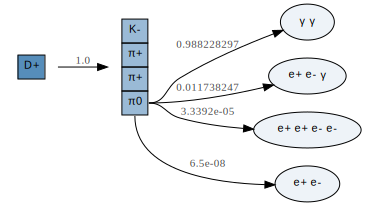

In [59]:
DecayChainViewer(d)

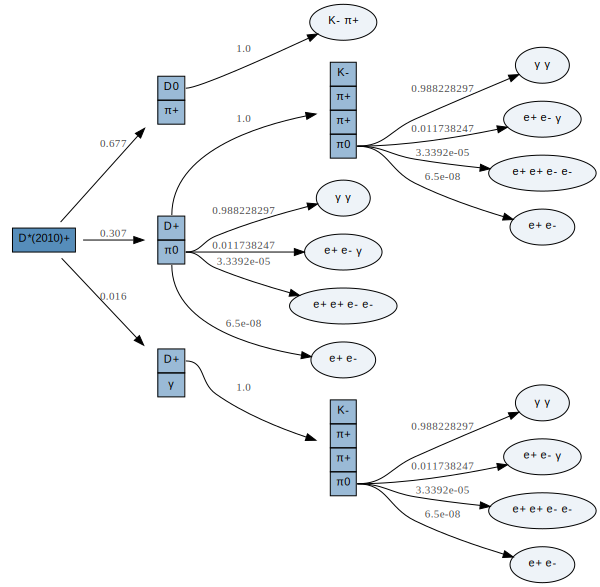

In [60]:
chain = parser.build_decay_chain('D*+')
DecayChainViewer(chain)

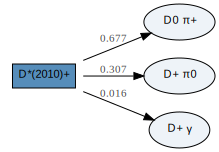

In [61]:
chain = parser.build_decay_chain('D*+', stable_particles=['D+', 'D0', 'pi0'])
DecayChainViewer(chain)

#### Charge conjugation:

In [62]:
ChargeConjugateReplacement().visit(parser._parsed_dec_file.children[0])

Tree(decay, [Tree(particle, [Token(LABEL, 'D*(2010)-')]), Tree(decayline, [Tree(value, [Token(SIGNED_NUMBER, '0.6770')]), Tree(particle, [Token(LABEL, 'D~0')]), Tree(particle, [Token(LABEL, 'pi-')]), Tree(model, [Token(MODEL_NAME, 'VSS')])]), Tree(decayline, [Tree(value, [Token(SIGNED_NUMBER, '0.3070')]), Tree(particle, [Token(LABEL, 'D-')]), Tree(particle, [Token(LABEL, 'pi0')]), Tree(model, [Token(MODEL_NAME, 'VSS')])]), Tree(decayline, [Tree(value, [Token(SIGNED_NUMBER, '0.0160')]), Tree(particle, [Token(LABEL, 'D-')]), Tree(particle, [Token(LABEL, 'gamma')]), Tree(model, [Token(MODEL_NAME, 'VSP_PWAVE')])])])

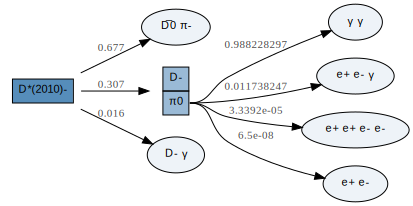

In [63]:
d = parser.build_decay_chain('D*-')
DecayChainViewer(d)

#### The LHCb "master decay file"

It's a big file - 11,0010 lines, with generic decays.

In [65]:
parser = DecFileParser('data/DECAY_LHCB.DEC')
parser

<DecFileParser: decfile(s)=['data/DECAY_LHCB.DEC']>

In [66]:
%%time
parser.parse()
parser

Wall time: 5.19 s


In [67]:
parser.dict_aliases()

{'K*L': 'K*0',
 'K*S': 'K*0',
 'K*BL': 'anti-K*0',
 'K*BS': 'anti-K*0',
 'K*0T': 'K*0',
 'anti-K*0T': 'anti-K*0',
 'K*BR': 'anti-K*0',
 'K*0R': 'K*0',
 'anti-K_0*0N': 'anti-K_0*0',
 'K_0*0N': 'K_0*0',
 'B0sig': 'B0',
 'anti-B0sig': 'anti-B0',
 'B+sig': 'B+',
 'B-sig': 'B-',
 'B_s0sig': 'B_s0',
 'anti-B_s0sig': 'anti-B_s0',
 'B_c+sig': 'B_c+',
 'B_c-sig': 'B_c-',
 'eta_bsig': 'eta_b',
 'h_bsig': 'h_b',
 'Sigma_b-sig': 'Sigma_b-',
 'anti-Sigma_b+sig': 'anti-Sigma_b+',
 'Lambda_b0sig': 'Lambda_b0',
 'anti-Lambda_b0sig': 'anti-Lambda_b0',
 'Omega_b-sig': 'Omega_b-',
 'anti-Omega_b+sig': 'anti-Omega_b+',
 'Xi_b-sig': 'Xi_b-',
 'anti-Xi_b+sig': 'anti-Xi_b+',
 'Xi_b0sig': 'Xi_b0',
 'anti-Xi_b0sig': 'anti-Xi_b0',
 'eta_csig': 'eta_c',
 'J/psisig': 'J/psi',
 'chi_c0sig': 'chi_c0',
 'chi_c1sig': 'chi_c1',
 'chi_c2sig': 'chi_c2',
 'psi(2S)sig': 'psi(2S)',
 'psi(3770)sig': 'psi(3770)',
 'D*+sig': 'D*+',
 'D*-sig': 'D*-',
 'D*0sig': 'D*0',
 'anti-D*0sig': 'anti-D*0',
 'D0sig': 'D0',
 'anti-D0sig': 

In [68]:
parser.dict_charge_conjugates()

{'K*L': 'K*BL',
 'K*S': 'K*BS',
 'K*0T': 'anti-K*0T',
 'K_0*0N': 'anti-K_0*0N',
 'K*0R': 'K*BR',
 'B0sig': 'anti-B0sig',
 'B+sig': 'B-sig',
 'B_s0sig': 'anti-B_s0sig',
 'B_c+sig': 'B_c-sig',
 'eta_bsig': 'eta_bsig',
 'h_bsig': 'h_bsig',
 'Sigma_b-sig': 'anti-Sigma_b+sig',
 'Lambda_b0sig': 'anti-Lambda_b0sig',
 'Omega_b-sig': 'anti-Omega_b+sig',
 'Xi_b-sig': 'anti-Xi_b+sig',
 'Xi_b0sig': 'anti-Xi_b0sig',
 'eta_csig': 'eta_csig',
 'J/psisig': 'J/psisig',
 'chi_c0sig': 'chi_c0sig',
 'chi_c1sig': 'chi_c1sig',
 'chi_c2sig': 'chi_c2sig',
 'psi(2S)sig': 'psi(2S)sig',
 'psi(3770)sig': 'psi(3770)sig',
 'D*+sig': 'D*-sig',
 'D*0sig': 'anti-D*0sig',
 'D0sig': 'anti-D0sig',
 'D+sig': 'D-sig',
 'D_s+sig': 'D_s-sig',
 'Lambda_c+sig': 'anti-Lambda_c-sig',
 'tau+sig': 'tau-sig',
 'Upsilonsig': 'Upsilonsig',
 'Upsilon(2S)sig': 'Upsilon(2S)sig',
 'Upsilon(3S)sig': 'Upsilon(3S)sig',
 'Upsilon(4S)sig': 'Upsilon(4S)sig',
 'Upsilon(5S)sig': 'Upsilon(5S)sig',
 'X_1(3872)sig': 'X_1(3872)sig',
 'h_csig': 'h_cs

## Interested ? Want to try it ?

#### Particle
- GitHub: https://github.com/scikit-hep/particle/
- Releases: [PyPI](https://pypi.org/project/Particle/)

#### DecayLanguage
- GitHub: https://github.com/scikit-hep/decaylanguage
- Releases: [PyPI](https://pypi.org/project/decaylanguage/)
